LOADING RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


LOADING DATA

In [2]:
raw_data = pd.read_csv(r"C:\Users\BHARATI\Desktop\pandas\creditcard.csv")

EXPLORATORY DATA ANALYSIS

In [3]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data.shape

(284807, 31)

In [5]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
raw_data.isnull().values.any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

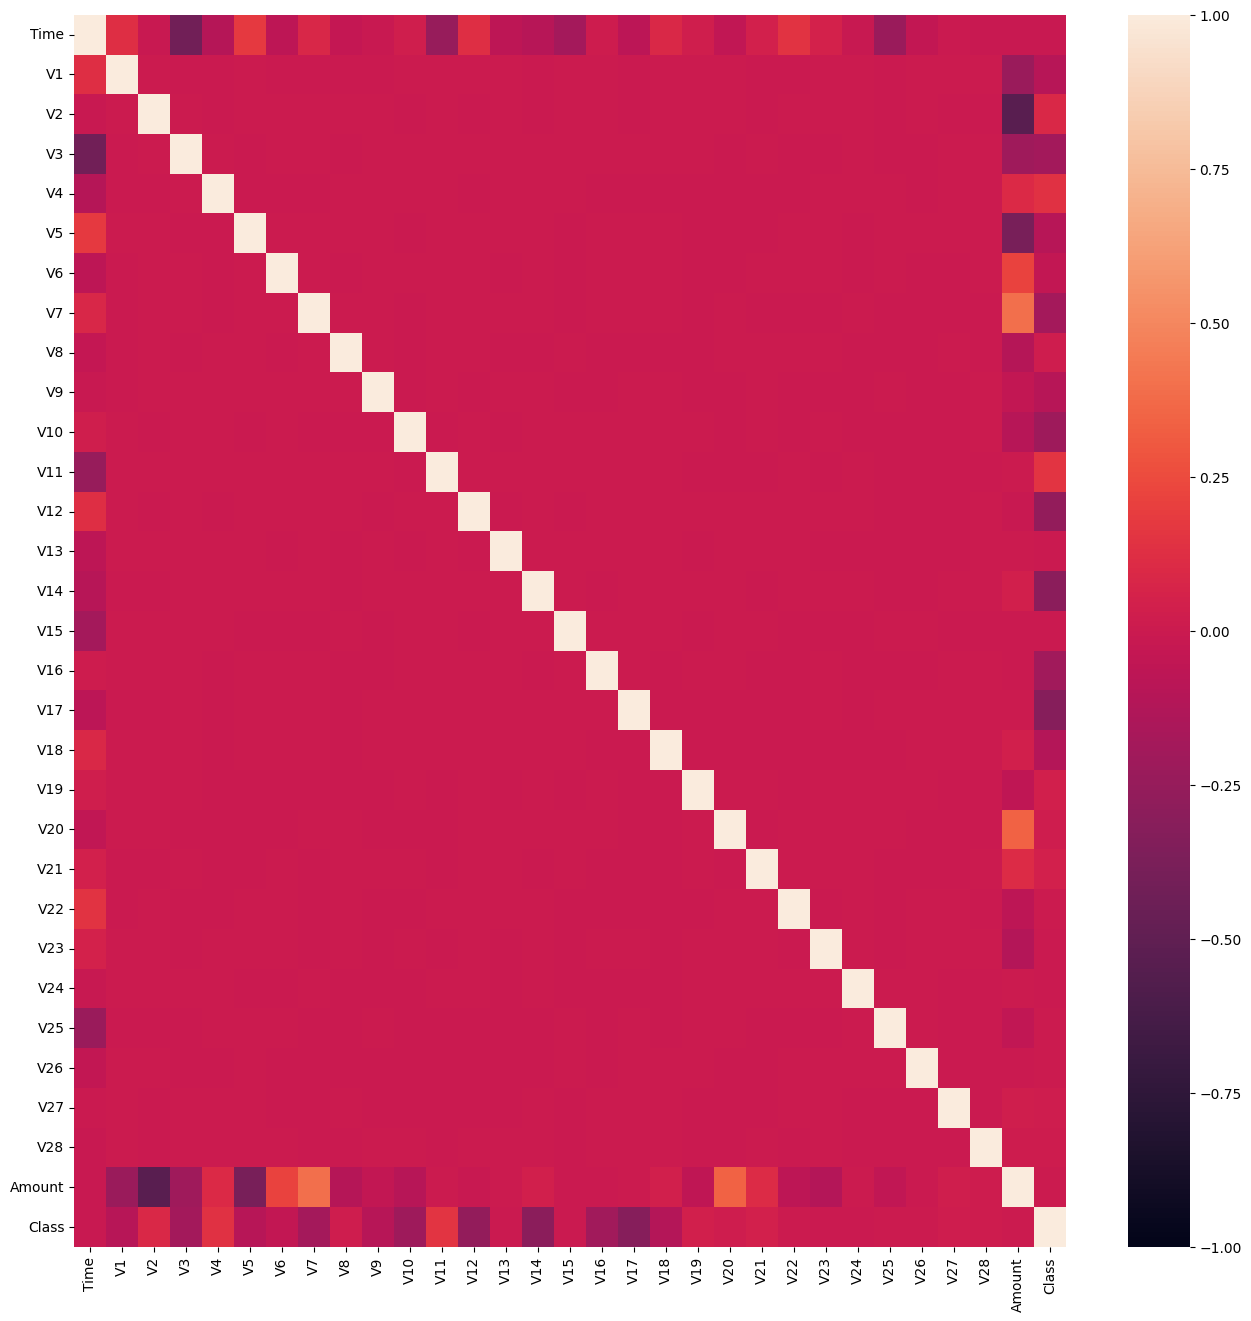

In [7]:
#checking the correlation between the features
corr_matrix = raw_data.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix,vmin = -1,vmax = 1)
plt.show
#Features are independent so we can proceed with the model

In [8]:
fraud = raw_data[raw_data['Class'] == 1]
casual = raw_data[raw_data['Class'] == 0]

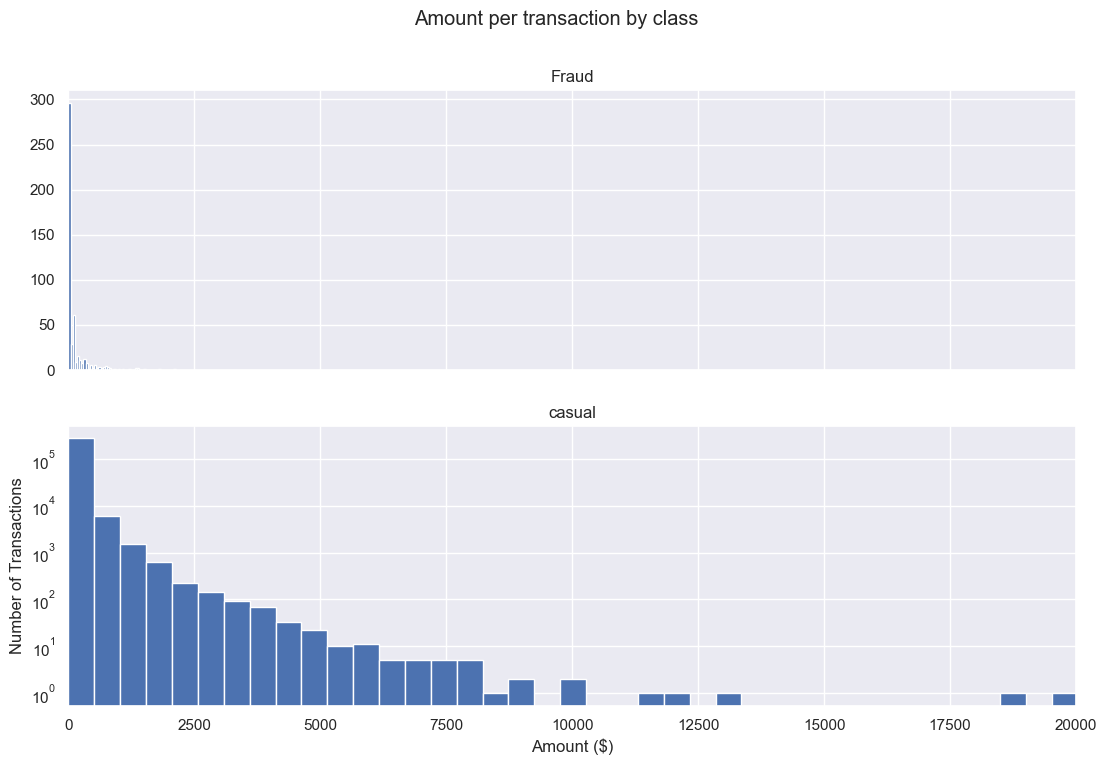

In [9]:
sns.set()
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (13,8))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(casual.Amount, bins = bins)
ax2.set_title('casual')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()
#does withdrawn money differentiate fraud and non-fraud transactions? No!(from below plot)

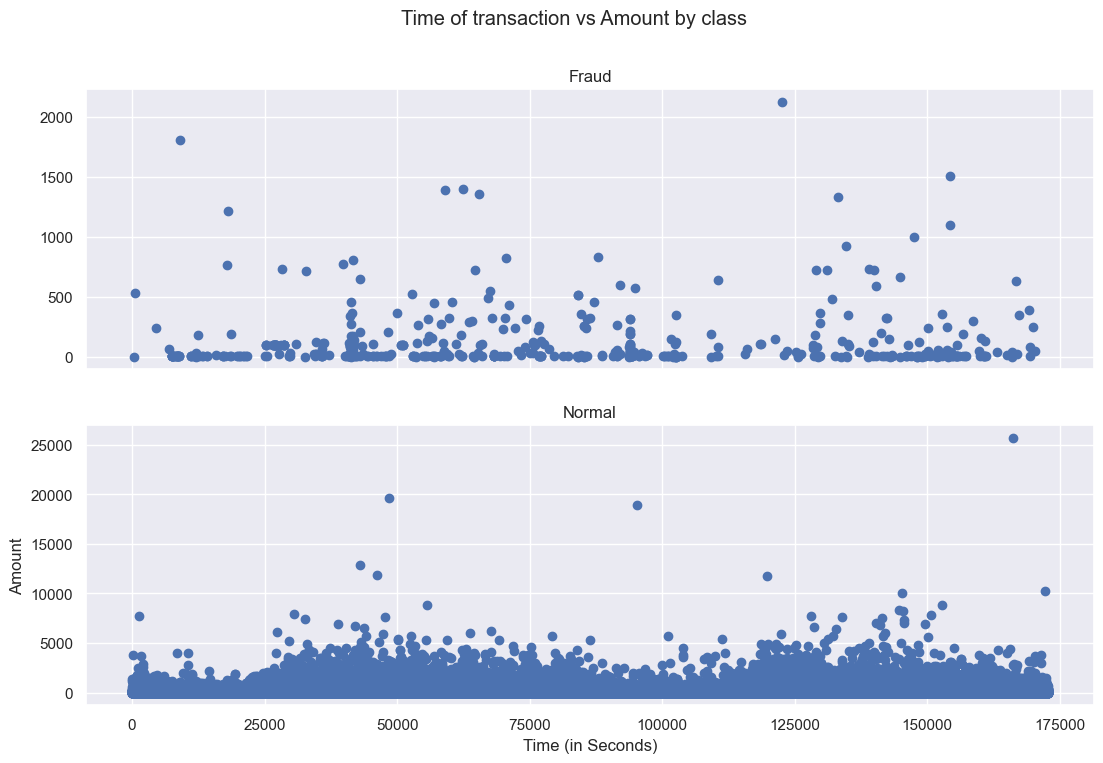

In [10]:
#Does certain timeframe have more fraud transactions? no
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (13,8))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(casual.Time, casual.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [11]:
count_class = raw_data['Class'].value_counts()
imbalanced_ratio = (count_class[1]/(count_class[0]+count_class[1]))*100
imbalanced_ratio

0.1727485630620034

Given credit card transactions data is an imbalanced data as the distribution is skewed in favor of  majority class label(non-fraudulent transactions).Oversampling balances the dataset leading to accurate predictions


MODEL PREDICTION

In [12]:
X = raw_data.drop('Class',axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = raw_data['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size=0.33)


In [13]:
over_xy =SMOTE()
X_train_res,y_train_res =over_xy.fit_resample(X_train,y_train)
print(y_train.value_counts(),y_train_res.value_counts())

Class
0    190477
1       343
Name: count, dtype: int64 Class
0    190477
1    190477
Name: count, dtype: int64


In [14]:
def testing(y_test,y_pred):
    conf_matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,6))
    sns.heatmap(conf_matrix,annot=True)
    plt.show()
    print(classification_report(y_test,y_pred))
    print('\n\n\n')

In [15]:


models = {'randomforest':RandomForestClassifier(),\
          'xgboost':XGBClassifier()
          }


randomforest


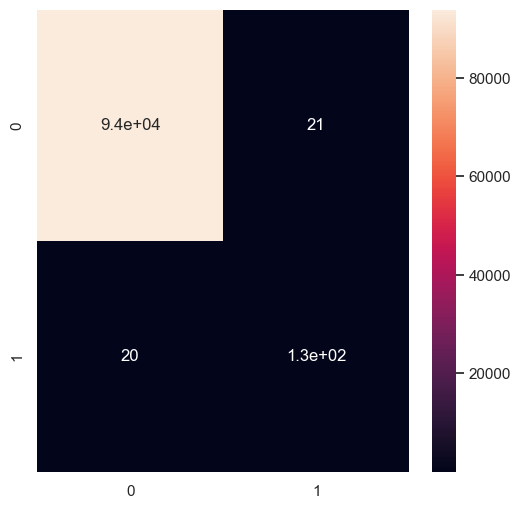

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.86      0.87      0.86       149

    accuracy                           1.00     93987
   macro avg       0.93      0.93      0.93     93987
weighted avg       1.00      1.00      1.00     93987





accuracy score  0.9995637694574782
roc_auc_score  0.9327740110723449
xgboost


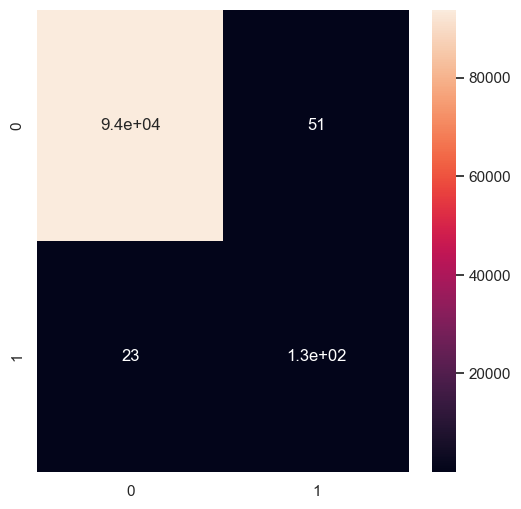

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.71      0.85      0.77       149

    accuracy                           1.00     93987
   macro avg       0.86      0.92      0.89     93987
weighted avg       1.00      1.00      1.00     93987





accuracy score  0.9992126570695947
roc_auc_score  0.9225470470242089


In [16]:
for i in models:
    results = models[i]
    print(i)
    results.fit(X_train_res,y_train_res)
    y_pred = results.predict(X_test)
    testing(y_test,y_pred)
    print('accuracy score ',accuracy_score(y_test,y_pred))
    print('roc_auc_score ',roc_auc_score(y_test,y_pred))

From the above performance metrics, we can conclude that random forest gives best predictions with 99.95% accuracy and roc auc score of 0.932 among all the other models.